# Sect 41:  Deeper Neural Networks


- Study Group: 05/26/20
- online-ds-pt-100719

## Learning Objectives

- Review basics from last class about an individual neuron. 
- Use `repo folder > references  > ANN diagrams.pptx` to talk through inputs and outputs

- Revisit bio neural networks PowerPoint with and discuss "How Neurons Learn" to review biological inspiration of deeper ANNs
    - `repo folder> references > bio_neural_networks.pptx`

- **Discuss details about deep neural networks:**
    - what makes an ANN "deep"?
    - what are the different activation functions?

# Review Neural Network Terminology from Last Class

### Processing within a Neuron


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg.png">

- **Activation functions** control the output of a neuron.($\hat y =f_{activation}(x)$ )
    - Most basic activation function is sigmoid functin ($\hat y =\sigma(x)$)
    - Choice of activation function controls the size/range of the output.
- **Linear transformations** ( $z = w^T x + b$ ) are used control the output of the activation function .
    - where $w^T $ is the weight(/coefficient), $x$ is the input, and  $b$ is a bias. 
        - weights: 
        - bias:
        

### How Neurons Learn

- **Loss functions** ($\mathcal{L}(\hat y, y) $)  measure inconsistency between predicted ($\hat y$) and actual $y$
    - will be optimized using gradient descent
    - defined over 1 traning sample
- **Cost functions** takes the average loss over all of the samples.
    - $J(w,b) = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$
    - where $l$ is the number of samples

#### How weights and biases are updated
- **Forward propagation** is the calculating  loss and cost functions.
- **Back propagation** involves using gradient descent to update the values for  $w$ and $b$.
    - $w := w- \alpha\displaystyle \frac{dJ(w)}{dw}$ <br><br>
    - $b := b- \alpha\displaystyle \frac{dJ(b)}{db}$

        - where $ \displaystyle \frac{dJ(w)}{dw}$ and $\displaystyle \frac{dJ(b)}{db}$ represent the *slope* of the function $J$ with respect to $w$ and $b$ respectively
        - $\alpha$ denote the *learning rate*. 
 

## Activation Functions
- https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from functions import *

## Plot activation functions
# act_funcs = [sigmoid,tanh,arctan,relu,leaky_relu]
# [plot_activation(fn) for fn in act_funcs]
  

- **sigmoid:**<br>
<!-- <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_33_1.png" width=200> -->
    - $ f_a=\dfrac{1}{1+ \exp(-z)}$
    - outputs 0 to +1
    

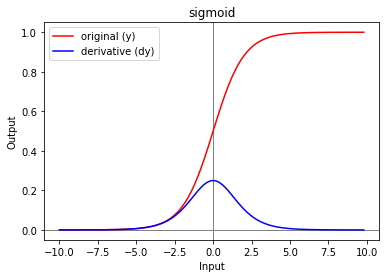

In [2]:
plot_activation(sigmoid)

- **tanh (hyperbolic tan):**<br>
    - $f_a = =\dfrac{\exp(z)- \exp(-z)}{\exp(z)+ \exp(-z)}$
    - outputs -1 to +1
    - Generally works well in intermediate layers
    - one of most popular functions
    

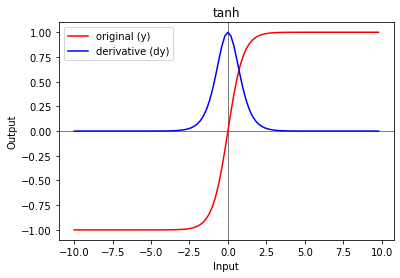

In [3]:
plot_activation(tanh)

- **arctan**
    -  similar qualities as tanh, but slope is more gentle than tanh
    - outputs ~ 1.6 to 1.6
    

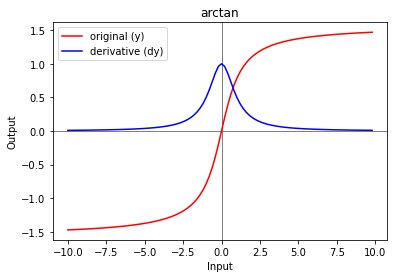

In [4]:
plot_activation(arctan)

-  **Rectified Linear Unit (relu):**<br>
    - most popular activation function
    - Activation is exactly 0 when Z <0
    - Makes taking directives slightly cumbersome
    - $f_a=\max(0,z)$
    

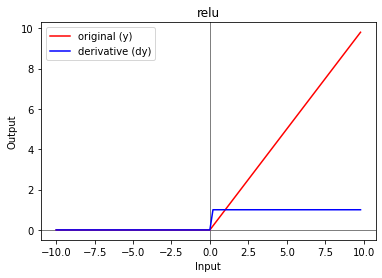

In [5]:
plot_activation(relu)

- **leaky_relu:**
    -  altered version of relu where the activatiom is slightly negative when $z<0$
    - $f_a=\max(0.001*z,z)$

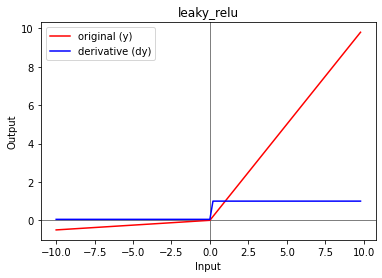

In [6]:
plot_activation(leaky_relu)

# Sect 41:  Deeper Neural Networks


### Revisit `bio_neural_networks.pptx`

- `repo folder> references > bio_neural_networks.pptx`

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-image-classification-with-mlps-online-ds-ft-100719/master/images/Deeper_network.jpg">

## Why deeper networks?

- **Advantages:**
    - largely eliminates need for feature engineering
    - multiple levels of information processing in one networking.
        - Ex: for images:
            - First layer detects edges
            - second layer gorups edges and detects patterns
            - more layers group even bigger parts together
        - Ex: for audio:
            - first layer: low level wave features
            - second: basic units of sounds ("phonemes")
            - third: word recognition
            - fourth: sentence recognition
    

### Demo: Revisit Tensorflow Playground Spiral 

- [Tensorflow Playground - Spiral Task](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.58541&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
    - [Potenial Solution](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,5,5,2&seed=0.58541&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
    

## How many layers/units?

- **Two schools of thought on how how many layers:**
    - Start with a single layer with few neurons
        - Add additional, add additional
    - Start with a fully fleshed out network that we then prune until we see a dropoff in in performance (then restore the last changes)

### Other Resources

- [Visualization of a Convolutional Neural Network - maybe?](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)

- [Blog post: How many Hidden Layers?](https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e)

## Math Notation for Deeper Networks:

- Networks are comprised of sequential layers of neurons/nodes.
    - \# of layers = hidden+output layer
        - The input layer is not counted as formal layer.
    - All layers except the final are _hidden layers_.
    
    <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/figures/small_deeper.png">
    
    
**The output of a layer $j$ is denoted as $a^{[j]}$.**

**For our 2-layer neural network above, this means that:**

- $x = a^{[0]}$  as x is what comes out of the input layer
- $a^{[1]} = \begin{bmatrix} a^{[1]}_1  \\ a^{[1]}_2 \\ a^{[1]}_3  \\\end{bmatrix}$ is the value generated by the hidden layer
- $\hat y =  a^{[2]}$, the output layer will generate a value $a^{[2]}$, which is equal to $\hat y$.



<br>For the **first node** in the hidden layer:
- The linear transformation that occurs is:  $ z^{[1]}_1 = w^{[1]}_1 x +b^{[1]}_1$,
    - Where $w$ = the weight, and $b$ = bias

- For **all nodes** in the hidden layer:
    - $ z^{[1]}_1 = w^{[1]}_1 x +b^{[1]}_1$ and  $a^{[1]}_1= f(z^{[1]}_1)$

    - $ z^{[1]}_2 = w^{[1]}_2 x +b^{[1]}_2$ and $a^{[1]}_2= f(z^{[1]}_2)$

    - $ z^{[1]}_3 = w^{[1]}_3 x +b^{[1]}_3$ and $a^{[1]}_3= f(z^{[1]}_3)$

The **dimensions** of the elements:

- $w^{[1]} = \begin{bmatrix} w^{[1]}_{1,1}  & w^{[1]}_{2,1} & w^{[1]}_{3,1}  \\ w^{[1]}_{1,2}  & w^{[1]}_{2,2} & w^{[1]}_{3,2}\end{bmatrix}$
    - where, eg. $w^{[1]}_{1,2}$ denotes the weight of the arrow going **from $x_2$ into the first node** of the hidden layer. 


- When multiplying the transpose of this matrix (making it a 2 x 3 matrix) 
    - $w^{[1]T}_1$ with $x = \begin{bmatrix} x_1  \\x_2\end{bmatrix}$ and add $b^{[1]} = \begin{bmatrix} b^{[1]}_1  \\b^{[1]}_2 \\ b^{[1]}_3 \end{bmatrix}$,
    - we obtain $z^{[1]} = \begin{bmatrix} z^{[1]}_1  \\z^{[1]}_2 \\ z^{[1]}_3 \end{bmatrix}$.

----

- The activation function is   $a^{[1]}_1= f(z^{[1]}_1)$.
$w^{[1]}_{1,2}$

$w^{[1]} = \begin{bmatrix} w^{[1]}_{1,1}  & w^{[1]}_{2,1} & w^{[1]}_{3,1}  \\ w^{[1]}_{1,2}  & w^{[1]}_{2,2} & w^{[1]}_{3,2}\end{bmatrix}$ 

[Reminder: $x = \begin{bmatrix} x_1  \\x_2\end{bmatrix} \equiv a^{[0]}$ and that $a^{[2]} = \hat y$ ]

- Then, given input $x$:

    - $z^{[1]} = w^{[1]T} a^{[0]} + b^{[1]}$

    - $a^{[1]} = f(z^{[1]})$

    - $z^{[2]} = w^{[2]T} a^{[1]} + b^{[2]}$

    - $a^{[2]} = f(z^{[1]})$
    
    
- When adding in several training samples ($i$), these become:
    - $z^{[1](i)} = w^{[1]T} a^{[0](i)} + b^{[0]}$

    - $a^{[1](i)} = f(z^{[1](i)})$

    - $z^{[2](i)} = w^{[2]T} a^{[1](i)} + b^{[2]}$

    - $a^{[2](i)} = f(z^{[1](i)})$
    
<!---    
### Process Summary
- We begin by defining a model architecture which includes the number of hidden layers, activation functions (sigmoid or relu) and the number of units in each of these.  
- We then initialize parameters for each of these layers (typically randomly). After the initial parameters are set, forward propagation evaluates the model giving a prediction, which is then used to evaluate a cost function. Forward propogation involves evaluating each layer and then piping this output into the next layer. 
- Each layer consists of a linear transformation and an activation function.  The parameters for the linear transformation in **each** layer include $W^l$ and $b^l$. The output of this linear transformation is represented by $Z^l$. This is then fed through the activation function (again, for each layer) giving us an output $A^l$ which is the input for the next layer of the model.  
- After forward propogation is completed and the cost function is evaluated, backpropogation is used to calculate gradients of the initial parameters with respect to this cost function. Finally, these gradients are then used in an optimization algorithm, such as gradient descent, to make small adjustments to the parameters and the entire process of forward propogation, back propogation and parameter adjustments is repeated until the modeller is satisfied with the results.--->

### Parameter Summary (Deep Networks Lesson):
Notation for when there are $L$ layers present (and $l$ is current layer)

**Parameters for the linear transformation: **  

$W^{[l]}: (n^{[l]}, n^{[l-1]})$

$b^{[l]}: (n^{[l]}, 1)$

$dW^{[l]}: (n^{[l]}, n^{[l-1]})$

$db^{[l]}: (n^{[l]}, 1)$

**Parameters for the activation function**  

$ a^{[l]}, z^{[l]}: (n^{[l]}, 1)$

$ Z^{[l]}, A^{[l]}: (n^{[l]}, m)$

$ dZ^{[l]}, dA^{[l]}: (n^{[l]}, m)$

# Basics of Building a Neural Network with Keras:


**Basics of Building a Neural Network with Keras:**
1. **Import required modules**
    - **For general neural network**
        - `from keras import models, layers,optimizers`
    - **For text:**
        - `from keras.preprocessing.text import Tokenizer`
        - `from keras.utils import to_categorical`
    - **For images:**
        - `from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img`
    - **For relocating image files:**
        - `import os, shutil`

2. **Decide on a network architecture (have only discussed sequential thus far)**
    - `model = models.Sequential()`

3. **Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.**
    - `model.add(layers.Dense(units, activation='relu', input_shape))`
    - `model.add(layers.Dense(units, activation='relu',input_shape))`
    - **3B. Final layer choice:**
        - Want to have as many neurons as classes you are trying to predict
        -  Final activation function:
            - For binary classificaiton, use `activation='sigmoid'`
            - For multi classificaiton, use `activation='softmax'`
        - For regression tasks, have a single final neuron.

4. **Compile the model:**
    - Specify optimiziers
        - `RMSprop`, `SGD`
    - specify loss functions
        - for binary classification: `'binary_crossentropy'`
        - for multi classification: `'categorical_crossentropy'`
    - specify metrics
        -usually 'acc'
    
    

5. **Training the model**
    - `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`
        - Note: if using images with ImageDataGenerator, use `model.fit_generator()`
    
    - **batches:**
        - a set of N samples, processed independently in parallel
        - a batch determines how many samples are fed through before back-propagation. 
        - model only updates after a batch is complete.
        - ideally have as large of a batch as your hardware can handle without going out of memory.
            - larger batches usually run faster than smaller ones for evaluation/prediction. 
    - **epoch:**
        - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
        - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
        - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).
        

6. **Evaluation / Predictions**
    - To get predicted results:
        - `y_hat_test = model.predict(test)`
    - To get evaluation metrics:
        - `results_test = model.evaluate(test, label_test)`
        

7. **Visualization**
    - **`history =  model.fit()` creates history object with .history attribute.**
        - `history.history()` returns a dictionary of metrics from each epoch. 
            - `history.history['loss']` and `history.history['acc']` 
 

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-image-classification-with-mlps-online-ds-ft-100719/master/images/Deeper_network.jpg">

## Image Classification with MLPs - Lab

In [5]:
from fsds_100719.imports import *

import keras
from keras.datasets import mnist

from keras import models, layers,optimizers
from keras.models import Sequential
from keras.layers import Dense#,Dropout

from keras.utils import to_categorical

fsds_1007219  v0.7.21 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


Using TensorFlow backend.


In [26]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
## Print out image shapes and data shapes
print(sample_image.shape)
print(f"X_train.shape={X_train.shape}")
print(f"X_test.shape={X_test.shape}")
print(sample_image.shape[0]*sample_image.shape[1])

(28, 28)
X_train.shape=(60000, 28, 28)
X_test.shape=(10000, 28, 28)
784


[Text(0.5, 1.0, 'Image #37762:  Label=7')]

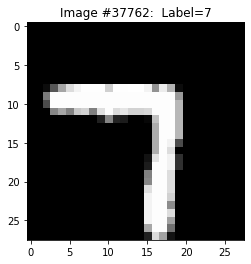

In [7]:
## Visualize random image
i = np.random.choice(list(range(len(X_train))))
sample_image = X_train[i]
sample_label = y_train[i]

title = f"Image #{i}:  Label={sample_label}"
plt.imshow(sample_image, cmap='gray')

ax= plt.gca()
ax.set(title=title)


In [27]:
## SAVE SHAPES FOR EASY ACCESS LATE
X_shapes = dict(X_train=X_train.shape,
                X_test=X_test.shape,
               y_train=y_train.shape,
               y_test=y_test.shape,
               image=sample_image.shape,
                image_flat = sample_image.shape[0]*sample_image.shape[1]
               )
X_shapes

{'X_train': (60000, 28, 28),
 'X_test': (10000, 28, 28),
 'y_train': (60000,),
 'y_test': (10000,),
 'image': (28, 28),
 'image_flat': 784}

> ***We can interpret these numbers as saying "X_train consists of 60,000 images that are 28x28". We'll need to reshape them from (28, 28), a 28x28 matrix, to (784,), a 784-element vector. However, we need to make sure that the first number in our reshape call for both X_train and X_test still correspond to the number of observations we have in each.***

In [10]:
shapes = list(sample_image.shape)
shapes

[28, 28]

In [11]:
X_shapes = dict(X_train=X_train.shape,
               X_test=X_test.shape,
               y_train=y_train.shape,
                y_test=y_test.shape,
               image=sample_image.shape,
               image_unrow = sample_image.shape[0]*sample_image.shape[1],)

print(X_shapes['X_train'])
print(X_shapes['image_unrow'])

(60000, 28, 28)
784


In [12]:
#  reshape and convert astype('float32') so that we convert our data from type uint8 to float32
X_train = X_train.reshape(X_shapes['X_train'][0], X_shapes['image_unrow']).astype('float32')
X_test = X_test.reshape(X_shapes['X_test'][0], X_shapes['image_unrow']).astype('float32')

In [13]:
## normalizing data 
X_train /= 255
X_test /= 255

### Preparing Targets

- This is a **Multiclass Classification** problem.
    - we need to One-Hot Encode our labels
    - `keras.utils.to_categorical`
    
- For multi classification:
    - good final activation function is softmax
    - categorical_crossentytropu


In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train.shape

(60000, 10)

In [16]:
## build network

model = models.Sequential()
model.add( 
    Dense(64, activation='tanh',
          input_shape=(X_shapes['image_unrow'],) 
                ))

model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
## compile model
compile_kws= dict(loss='categorical_crossentropy', 
             optimizer='sgd',metrics=['accuracy'])
model.compile(**compile_kws)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [18]:
## Train network
results = model.fit(X_train, y_train, batch_size=64, epochs= 5,
                   validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.8458 - accuracy: 0.7997 - val_loss: 0.4868 - val_accuracy: 0.8801
Epoch 2/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.4454 - accuracy: 0.8845 - val_loss: 0.3833 - val_accuracy: 0.8993
Epoch 3/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3774 - accuracy: 0.8970 - val_loss: 0.3411 - val_accuracy: 0.9069
Epoch 4/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3435 - accuracy: 0.9052 - val_loss: 0.3172 - val_accuracy: 0.9126
Epoch 5/5
60000/60000 [==============================] - 1s 14us/step - loss: 0.3212 - accuracy: 0.9101 - val_loss: 0.3008 - val_accuracy: 0.9160


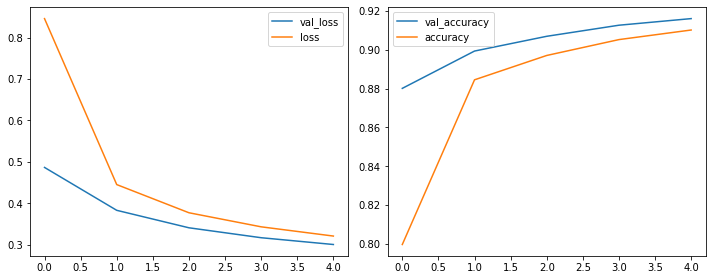

In [19]:
def visualize_training_results(results,figsize=(10,4),subplot_kws={}):
    history = results.history
    fig,axes=plt.subplots(ncols=2,figsize=figsize,**subplot_kws)
    
    ax=axes[0]
    ax.plot(history['val_loss'],label='val_loss')
    ax.plot(history['loss'], label='loss')
    ax.legend()
    
    ax=axes[1]
    ax.plot(history['val_accuracy'],label='val_accuracy')
    ax.plot(history['accuracy'], label='accuracy')

    ax.legend()
    
    plt.tight_layout()
visualize_training_results(results)

In [20]:
## MODEL 2: Try a bigger model
## build network

model2= models.Sequential()
model2.add( 
    Dense(64, activation='tanh',
          input_shape=(X_shapes['image_unrow'],) 
                ))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [21]:
compile_kws=dict(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.compile(**compile_kws)
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.9084 - accuracy: 0.7815 - val_loss: 0.5121 - val_accuracy: 0.8821
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.4479 - accuracy: 0.8868 - val_loss: 0.3757 - val_accuracy: 0.9030
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3605 - accuracy: 0.9027 - val_loss: 0.3231 - val_accuracy: 0.9112
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.3188 - accuracy: 0.9114 - val_loss: 0.2955 - val_accuracy: 0.9173
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.2917 - accuracy: 0.9177 - val_loss: 0.2745 - val_accuracy: 0.9241


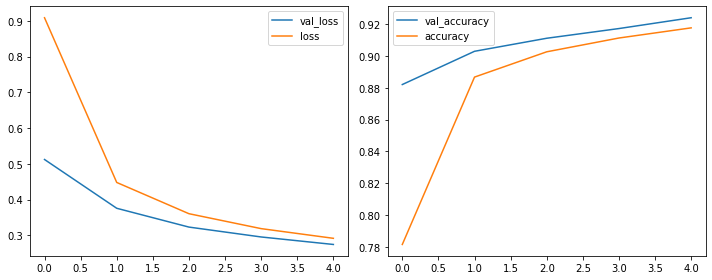

In [22]:
results2 = model2.fit(X_train,y_train, 
                      batch_size=64, epochs=5,
                      validation_data=(X_test,y_test))
visualize_training_results(results2)

In [23]:
## Model 3
model3= models.Sequential()
model3.add( 
    Dense(64, activation='relu', input_shape=(X_shapes['image_unrow'],) ))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))

compile_kws=dict(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model3.compile(**compile_kws)

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.9799 - accuracy: 0.7324 - val_loss: 0.4602 - val_accuracy: 0.8757
Epoch 2/5
60000/60000 [==============================] - 1s 15us/step - loss: 0.3993 - accuracy: 0.8881 - val_loss: 0.3284 - val_accuracy: 0.9070
Epoch 3/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.3215 - accuracy: 0.9073 - val_loss: 0.2931 - val_accuracy: 0.9148
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.2865 - accuracy: 0.9169 - val_loss: 0.2648 - val_accuracy: 0.9245
Epoch 5/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.2627 - accuracy: 0.9241 - val_loss: 0.2459 - val_accuracy: 0.9280


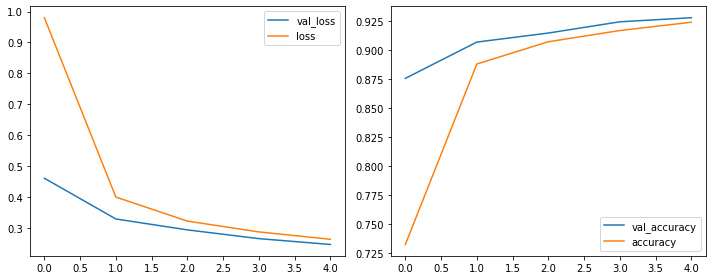

In [24]:
results3 = model3.fit(X_train,y_train, 
                      batch_size=64, epochs=5,
                      validation_data=(X_test,y_test))
visualize_training_results(results3)

# Sidebar: Augmenting Image Data


### 💡 Data Augmentation (not covered in class)
- Simplest way to reduce overfitting is to increase the size of the training data.
- Difficult to do with large datasets, but can be implemented with images as shown below:
- **For augmenting image data:**
    - Can alter the images already present in the training data by shifting, shearing, scaling, rotating.<br><br> <img src ="https://www.dropbox.com/s/9i1hl3quwo294jr/data_augmentation_example.png?raw=1" width=300>
    - This usually provides a big leap in improving the accuracy of the model. It can be considered as a mandatory trick in order to improve our predictions.

- **In Keras:**
    - `ImageDataGenerator` contains several augmentations available.
    - Example below:
    
```python
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal flip=True)
datagen.fit(train)
```